<a href="https://colab.research.google.com/github/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/BIG_A5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [ ]:
df.isnull().sum()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64

In [ ]:
df.shape

(26, 10)

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(columns='Country'))
X = scaler.transform(df.drop(columns='Country'))

X[0:5]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507]])

## Número de Clusters

(Moodle) **Q1**. Qual ao valor médio de silhueta para o melhor número de clusters `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics 

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182
Silhueta média para 10 clusters:  0.181


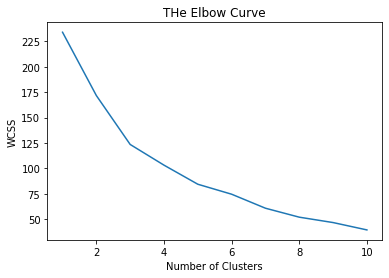

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for n_clusters in range(1,11):
    clf = KMeans(n_clusters=n_clusters, random_state=1234)
    clf.fit(X)
    wcss.append(clf.inertia_)
    
plt.plot(range(1,11),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue parâmetros não solicitados. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 

for n_clusters in range(2,11):
  clf = AgglomerativeClustering(n_clusters=n_clusters)   
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para ward', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para ward 2 clusters:  0.456
Silhueta média para ward 3 clusters:  0.244
Silhueta média para ward 4 clusters:  0.251
Silhueta média para ward 5 clusters:  0.242
Silhueta média para ward 6 clusters:  0.179
Silhueta média para ward 7 clusters:  0.187
Silhueta média para ward 8 clusters:  0.175
Silhueta média para ward 9 clusters:  0.18
Silhueta média para ward 10 clusters:  0.178


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 

for n_clusters in range(2,11):
  clf = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')   
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para complete', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para ward 2 clusters:  0.456
Silhueta média para ward 3 clusters:  0.227
Silhueta média para ward 4 clusters:  0.206
Silhueta média para ward 5 clusters:  0.193
Silhueta média para ward 6 clusters:  0.207
Silhueta média para ward 7 clusters:  0.187
Silhueta média para ward 8 clusters:  0.174
Silhueta média para ward 9 clusters:  0.161
Silhueta média para ward 10 clusters:  0.152


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 

for n_clusters in range(2,11):
  clf = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')   
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para complete', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para complete 2 clusters:  0.461
Silhueta média para complete 3 clusters:  0.388
Silhueta média para complete 4 clusters:  0.134
Silhueta média para complete 5 clusters:  0.211
Silhueta média para complete 6 clusters:  0.128
Silhueta média para complete 7 clusters:  0.101
Silhueta média para complete 8 clusters:  0.086
Silhueta média para complete 9 clusters:  0.126
Silhueta média para complete 10 clusters:  0.056


In [ ]:
clf = AgglomerativeClustering(n_clusters=2, linkage='single')   
clf.fit(X)
labels = clf.labels_

In [ ]:
df['Cluster'] = labels
df.head(10)

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,0
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,0
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,0
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,0
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,0
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,0
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,0
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,0
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,0
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0,0


In [ ]:
df.Cluster.value_counts()

0    25
1     1
Name: Cluster, dtype: int64

## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Sabemos que esse conjunto, independente do valor que você obteve no item anterior é 3. Faça assim a clusterizção para 3 clusters com o método Kmédias e o a clusterização hierárquica para os esquemas de ligação (*linkage*) `complete` e `single`. 

(Moodle) **Q3**. Qual o método apresenta melhor *distribuição* da quantidade de elementos e qual é essa distribuição?

> Por exemplo, 10, 4, 2 é uma distribuição melhor que 10, 5, 1.

> Empregue `nstart=25` no kmédias. Não empregue outros parâmetros não solicitados. 

> Empregue a distância `euclidean` na clusterização hierárquica. Não empregue outros parâmetros não solicitados. 



In [ ]:
from sklearn.cluster import KMeans

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3, random_state= 1234)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]
[[ 2.17579264 -0.33695415 -1.87839051 -0.83405766 -1.79639567 -1.17191669
   0.33913963 -1.58626377 -1.40190152]
 [-0.49645361 -0.46398587  0.06891443  0.02997395  0.27708668  0.68508261
   0.42695257  0.42212305  0.01198006]
 [ 0.20226856  1.20494805  0.6475058   0.2889414   0.13654287 -1.06365309
  -1.12123713 -0.28502536  0.57343195]]


In [ ]:
df['Cluster'] = labels
df.head(10)

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,1
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,1
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,1
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,1
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0,1


In [ ]:
df.Cluster.value_counts()

1    16
2     7
0     3
Name: Cluster, dtype: int64

## Analisando os Grupos

Analise os valores médios dos grupos e os países pertencentes a cada grupo.

**Q3**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 



In [ ]:
df_clusters = df.groupby('Cluster').mean().reset_index()
df_clusters

,Cluster,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333
1,1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500
2,2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571


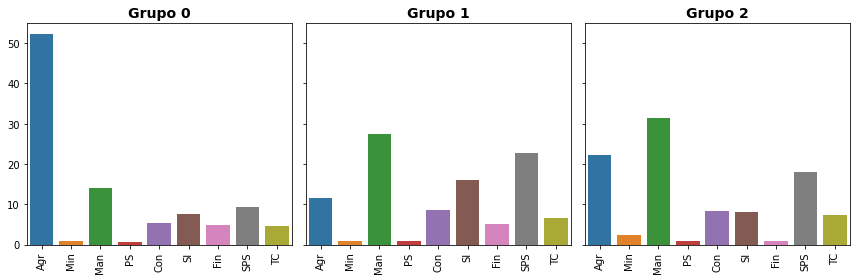

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

for i in range(len(df_clusters)):
  sns.barplot(data=df_clusters[df_clusters.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i), fontsize=14, weight='bold')
  ax[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



In [ ]:
df.groupby(['Cluster','Country']).Country.count()

Cluster  Country       
0        Greece            1
         Turkey            1
         Yugoslavia        1
1        Austria           1
         Belgium           1
         Denmark           1
         Finland           1
         France            1
         Ireland           1
         Italy             1
         Luxembourg        1
         Netherlands       1
         Norway            1
         Portugal          1
         Spain             1
         Sweden            1
         Switzerland       1
         United Kingdom    1
         W. Germany        1
2        Bulgaria          1
         Czechoslovakia    1
         E. Germany        1
         Hungary           1
         Poland            1
         Rumania           1
         USSR              1
Name: Country, dtype: int64

## Analisando os Grupos

Analise os valores médios dos grupos e os países pertencentes a cada grupo **empregando o método que apresentou a melhor distribuição da quantidade de elementos**.

**Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

**Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais diferencia os outros dois grupos?

